In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
from MARBLE import plotting, geometry, utils
from DE_library import simulate_ODE
import example_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simulate Lorenz system

In [3]:
par = {'sigma': 10.0, 'beta': 8/3.0, 'rho': 28.0, 'tau': 1.0}
fun = 'lorenz'

# par['sigma']*((par['sigma']+par['beta']+3)/(par['sigma']-par['beta']-1))

#simulate system
x0 = [-8.0, 7.0, 27.0]
T = np.linspace(0, 25, 500)
mu, sigma = 0, 1 # mean and standard deviation
X, _ = simulate_ODE(fun, T, x0, par, noise=False, mu=mu, sigma=sigma)

# Plot state-space

<Axes3DSubplot:>

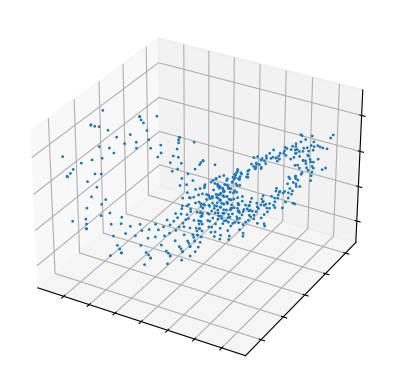

In [6]:
plotting.trajectories(X, style='o', lw=1, ms=1)

# Create random projections of state-space to scalar time series

In [7]:
from sklearn import random_projection
transformer = random_projection.SparseRandomProjection(n_components=1)

n_obs = 5

x = []
for i in range(n_obs):
    x_tmp = transformer.fit_transform(X)
    x_tmp = utils.standardise(x_tmp, norm='max')
    x.append(x_tmp)
    
x_stacked = np.hstack(x)
df = utils.to_pandas(x_stacked)

# Plot trajectories

(0.0, 5.0)

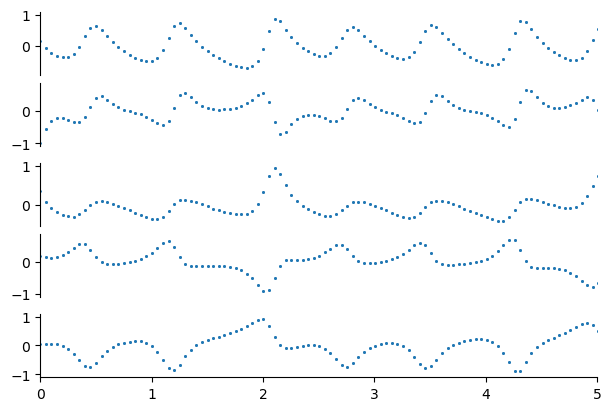

In [8]:
ax = plotting.time_series(T, x, style='o', figsize=(6,4), ms=1, save='Lorenz_projections.svg')
ax.set_xlim([0,5])

# Illustrate embedded attractors and neighbourhoods

In [9]:
tau = -2
E = 3
N=50

import pyEDM as pyEDM
    
#X_emb = time_series.delay_embed(X[:,0],dim,tau)
X_emb = pyEDM.Embed(dataFrame = utils.to_pandas(X[:,0]), E = E, tau = tau, columns = columns)
    
ind, lamb = geometry.furthest_point_sampling(X_emb, N)
    
ax = plotting.trajectories(X_emb, style='->', lw=0.5, arrowhead=5, axis=False)

ind = np.array(list(set(ind)))
_, nn = example_utils.find_nn(ind, X_emb, nn=2)
    
for i, nn_ in enumerate(nn):
    ax = example_utils.circle(ax, 2, X_emb[[ind[i]] + list(nn_)])

NameError: name 'time_series' is not defined

<Axes3DSubplot:>

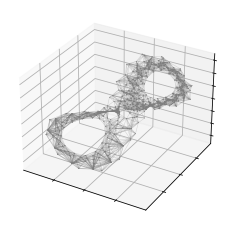

In [16]:
from torch_geometric.utils.convert import to_networkx
data = utils.construct_dataset(X_emb, graph_type='cknn', k=20)
G = to_networkx(data, node_attrs=['pos'], edge_attrs=None, to_undirected=True,
        remove_self_loops=True)
plotting.graph(G,labels=None,edge_alpha=0.3, edge_width=0.5)